In [1]:
from cvxopt import matrix, solvers
import numpy as np
from numpy.linalg import inv
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nestle

In [2]:
A_test = matrix([ [-1.0, 0.0, 0.0],[0.0, -1.0, 0.0], [0.0, 0.0, -1.0],[1.0, 0.0, 0.0],[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 1.0, 1.0]])
b_test = matrix([ 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 5.0 ])
c_test = matrix([ 1.0, 1.0, -1.0 ])

In [3]:
sol=solvers.lp(c_test,A_test.T,b_test)

     pcost       dcost       gap    pres   dres   k/t
 0:  1.4000e+00 -1.6200e+01  1e+01  0e+00  2e+00  1e+00
 1:  3.1572e-01 -3.2626e+00  2e+00  1e-16  3e-01  2e-01
 2: -1.8542e+00 -2.9102e+00  9e-01  3e-16  1e-01  1e-01
 3: -1.9983e+00 -2.0098e+00  9e-03  2e-16  1e-03  1e-03
 4: -2.0000e+00 -2.0001e+00  9e-05  3e-16  1e-05  1e-05
 5: -2.0000e+00 -2.0000e+00  9e-07  3e-16  1e-07  1e-07
 6: -2.0000e+00 -2.0000e+00  9e-09  1e-16  1e-09  1e-09
Optimal solution found.


In [4]:
print(sol['x'])

[ 1.95e-10]
[ 1.95e-10]
[ 2.00e+00]



In [5]:
print (sol['primal objective'])

-1.99999999829


In [6]:
print (sol['status'])

optimal


In [7]:
A = np.array(A_test).T
b = np.array(b_test)
c = np.array(c_test)

In [8]:
x_o = np.array([2,2,0]).reshape(3,1)

In [9]:
from numpy.linalg import inv

def simplex_opt(c,A,b,x_o):
    n = x_o.size
    m = b.size
    J = calculate_J(A,b,x_o)
    z = np.zeros((m,1))
    z[J] = calculate_z(A,J,c)
    while (z<0).any():
        k = np.argmin(z)
        dx = calculate_dx(A,J,k,m)
        alpha = recalculate_J(A,b,x_o,J,k,dx)
        x_o = x_o + alpha*dx
        J = calculate_J(A,b,x_o)
        z = np.zeros((m,1))
        z[J] = calculate_z(A,J,c)
        print('Optimal point is \n{}'.format(x_o))
    
def calculate_J(A,b,x_o):
    return np.where((A.dot(x_o)-b==0))[0]

def calculate_z(A,J,c):
    z = -inv(A[J].dot(A[J].T)).dot(A[J]).dot(c)
    return z

def calculate_dx(A,J,k,m):
    j = np.zeros((m,1))
    j[k] = -1
    dx = inv(A[J]).dot(j[J])
    return dx

def recalculate_J(A,b,x,J,k,dx):
    i = np.where(A.dot(dx) > 0)[0]
    j = np.argmin(((b[i]-A[i].dot(x))/(A[i].dot(dx))))
    j = i[j]
    alpha = (b[j]-A[j].T.dot(x))/A[j].T.dot(dx)
    return alpha

def calculate_c(c,x):
    c_in = c.reshape(c.size,1)
    x_in = x.reshape(x.size,1)
    return c_in.T.dot(x_in)

In [10]:
simplex_opt(c,A,b,x_o)

Optimal point is 
[[ 2.]
 [ 2.]
 [ 1.]]
Optimal point is 
[[ 1.]
 [ 2.]
 [ 2.]]
Optimal point is 
[[ 0.]
 [ 2.]
 [ 2.]]
Optimal point is 
[[ 0.]
 [ 0.]
 [ 2.]]


In [61]:
from cvxopt import blas, lapack, solvers, matrix, sqrt, mul, cos, sin


solvers.options['show_progress'] = False

try: import pylab
except ImportError: pylab_installed = False
else: pylab_installed = True

A_test = matrix([ [-1.0, 0.0, 0.0],[0.0, -1.0, 0.0], [0.0, 0.0, -1.0],[1.0, 0.0, 0.0],[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 1.0, 1.0]])
A = A_test.T
b = matrix([ 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 5.0 ])
c = matrix([ 1.0, 1.0, -1.0 ])

m = A[0] - 1

G, h = matrix(0.0, (m,3)), matrix(0.0, (m,1))


TypeError: invalid dimension tuple

In [62]:
m

-2.0

In [45]:




def F(x=None, z=None):
    if x is None:  
        return m, matrix([ 1.0, 0.0, 1.0, 0.0, 0.0 ])

    A = matrix( [x[0], x[1], x[1], x[2]], (2,2))
    L = +A
    try: lapack.potrf(L)
    except: return None
    B = +L
    lapack.potri(B)
    B[0,1] = B[1,0]
   
    f = matrix(0.0, (m+1,1))
    f[0] = -2.0 * (log(L[0,0]) + log(L[1,1]))

    c = x[3:]
    lapack.potrs(L, c)  
    for k in range(m):
        f[k+1] = (X[k,:].T - c).T * A * (X[k,:].T - c) - 1.0 

    Df = matrix(0.0, (m+1,5))
    Df[0,0], Df[0,1], Df[0,2] = -B[0,0], -2.0*B[1,0], -B[1,1]

    Df[1:,0] = X[:m,0]**2 - c[0]**2
    Df[1:,1] = 2.0 * (mul(X[:m,0], X[:m,1]) - c[0]*c[1])
    Df[1:,2] = X[:m,1]**2 - c[1]**2
    Df[1:,3] = 2.0 * (-X[:m,0] + c[0])
    Df[1:,4] = 2.0 * (-X[:m,1] + c[1])

    if z is None: return f, Df
    H0 = matrix(0.0, (5,5))
    H0[0,0] = B[0,0]**2
    H0[1,0] = 2.0 * B[0,0] * B[1,0]
    H0[2,0] = B[1,0]**2
    H0[1,1] = 2.0 * ( B[0,0] * B[1,1] + B[1,0]**2 )
    H0[2,1] = 2.0 * B[1,0] * B[1,1]
    H0[2,2] = B[1,1]**2
 
   
    H1 = matrix(0.0, (5,5))
    H1[0,0] = 2.0 * c[0]**2 * B[0,0] 
    H1[1,0] = 2.0 * ( c[0] * c[1] * B[0,0] + c[0]**2 * B[1,0] )
    H1[2,0] = 2.0 * c[0] * c[1] * B[1,0] 
    H1[3:,0] = -2.0 * c[0] * B[:,0] 
    H1[1,1] = 2.0 * c[0]**2 * B[1,1] + 4.0 * c[0]*c[1]*B[1,0]  + \
              2.0 * c[1]**2 + B[0,0]
    H1[2,1] = 2.0 * (c[1]**2 * B[1,0] + c[0]*c[1]*B[1,1])
    H1[3:,1] = -2.0 * B * c[[1,0]]
    H1[2,2] = 2.0 * c[1]**2 * B[1,1]
    H1[3:,2] = -2.0 * c[1] * B[:,1] 
    H1[3:,3:] = 2*B

    return f, Df, z[0]*H0 + sum(z[1:])*H1
    
sol = solvers.cp(F)
A = matrix( sol['x'][[0, 1, 1, 2]], (2,2)) 
b = sol['x'][3:]

if pylab_installed:
    pylab.figure(1, facecolor='w')
    pylab.plot(X[:,0], X[:,1], 'ko', X[:,0], X[:,1], '-k')
    
    L = +A
    lapack.potrf(L)
    c = +b
    lapack.potrs(L, c)    
    
    nopts = 1000
    angles = matrix( [ a*2.0*pi/nopts for a in range(nopts) ], (1,nopts) )
    circle = matrix(0.0, (2,nopts))
    circle[0,:], circle[1,:] = cos(angles), sin(angles)
    

    blas.trsm(L, circle, transA='T')
    ellipse = circle + c[:, nopts*[0]]
    ellipse2 = 0.5 * circle + c[:, nopts*[0]]
    
    pylab.plot(ellipse[0,:].T, ellipse[1,:].T, 'k-')
    pylab.fill(ellipse2[0,:].T, ellipse2[1,:].T, facecolor = '#F0F0F0')
    pylab.title('Loewner-John ellipsoid (fig 8.3)')
    pylab.axis('equal')
    pylab.axis('off')


D = [ matrix(0.0, (3,5)) for k in range(m) ]
for k in range(m):
    D[k][ [0, 3, 7, 11, 14] ] = matrix( [G[k,0], G[k,1], G[k,1], 
        -G[k,0], -G[k,1]] )
d = [matrix([0.0, 0.0, hk]) for hk in h]

def F(x=None, z=None):
    if x is None:  
        return m, matrix([ 1.0, 0.0, 1.0, 0.0, 0.0 ])
    if min(x[0], x[2], min(h-G*x[3:])) <= 0.0:  
        return None

    y = [ Dk*x + dk for Dk, dk in zip(D, d) ]

    f = matrix(0.0, (m+1,1))
    f[0] = -log(x[0]) - log(x[2])
    for k in range(m):  
        f[k+1] = y[k][:2].T * y[k][:2] / y[k][2] - y[k][2]
       
    Df = matrix(0.0, (m+1,5))
    Df[0,0], Df[0,2] = -1.0/x[0], -1.0/x[2]

    for k in range(m):
        a = y[k][:2] / y[k][2]
        gradg = matrix(0.0, (3,1))
        gradg[:2], gradg[2] = 2.0 * a, -a.T*a - 1
        Df[k+1,:] =  gradg.T * D[k]
    if z is None: return f, Df
    
    H = matrix(0.0, (5,5))
    H[0,0] = z[0] / x[0]**2
    H[2,2] = z[0] / x[2]**2

    for k in range(m):
        a = y[k][:2] / y[k][2]
        hessg = matrix(0.0, (3,3))
        hessg[0,0], hessg[1,1] = 1.0, 1.0
        hessg[:2,2], hessg[2,:2] = -a,  -a.T
        hessg[2, 2] = a.T*a
        H += (z[k] * 2.0 / y[k][2]) *  D[k].T * hessg * D[k]

    return f, Df, H 
    
sol = solvers.cp(F)
L = matrix([sol['x'][0], sol['x'][1], 0.0, sol['x'][2]], (2,2))
c = matrix([sol['x'][3], sol['x'][4]])

if pylab_installed:
    pylab.figure(2, facecolor='w')

    for k in range(m):
        edge = A_test[[k,k+1],:] + 0.1 * matrix([1., 0., 0., -1.], (2,2)) * \
            (X[2*[k],:] - X[2*[k+1],:])
        pylab.plot(edge[:,0], edge[:,1], 'k')
    
    
    nopts = 1000
    angles = matrix( [ a*2.0*pi/nopts for a in range(nopts) ], (1,nopts) )
    circle = matrix(0.0, (2,nopts))
    circle[0,:], circle[1,:] = cos(angles), sin(angles)
    
    ellipse = L * circle + c[:, nopts*[0]]
    ellipse2 = 2.0 * L * circle + c[:, nopts*[0]]
    
    pylab.plot(ellipse2[0,:].T, ellipse2[1,:].T, 'k-')
    pylab.fill(ellipse[0,:].T, ellipse[1,:].T, facecolor = '#F0F0F0')
    pylab.axis('equal')
    pylab.axis('off')

    pylab.show()

TypeError: incompatible dimensions

In [11]:
from cvxpy import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=[15,10])
ax = fig.gca(projection='3d')

def my_function():
    vxs = []
    C = np.array([[2.0, 1.0],[1.0, 2.0]])
    I = np.identity(2)
    X = Symmetric(2)
    for i in range(100):
        C = np.random.uniform(-1,1,(2,2))
        C[0,1] = C[1,0]
        constraints = [lambda_min(X-1/2 * I) >=0,lambda_min(I - X) >=0]
        obj = Minimize(trace(C*X))
        prob = Problem(obj, constraints)
        prob.solve()
        vx = np.zeros(3)
        vx[0] = X.value[0,0]
        vx[1] = X.value[1,1]
        vx[2] = X.value[1,0]
        vxs.append(vx)
        
    vxs = np.array(vxs)
    ax.scatter3D(vxs[:,0],vxs[:,1],vxs[:,2])
    plt.show()

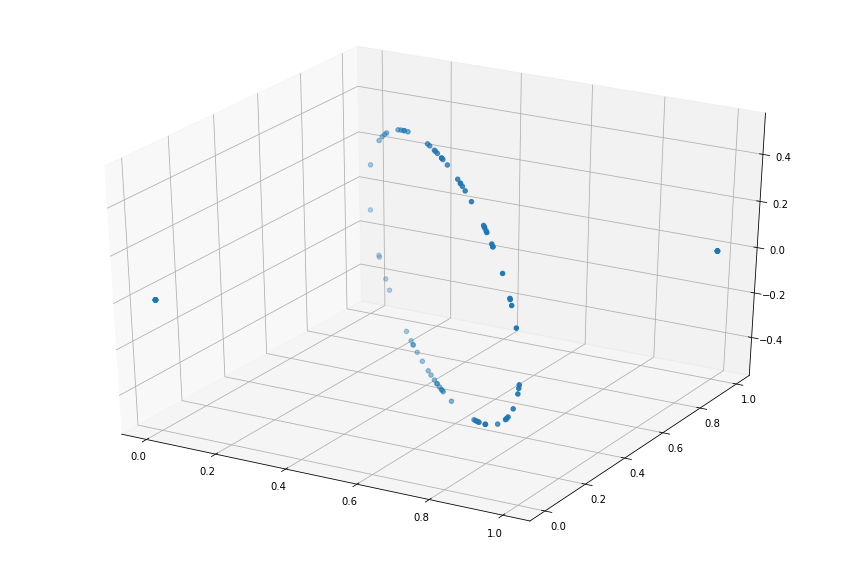

In [12]:
my_function()

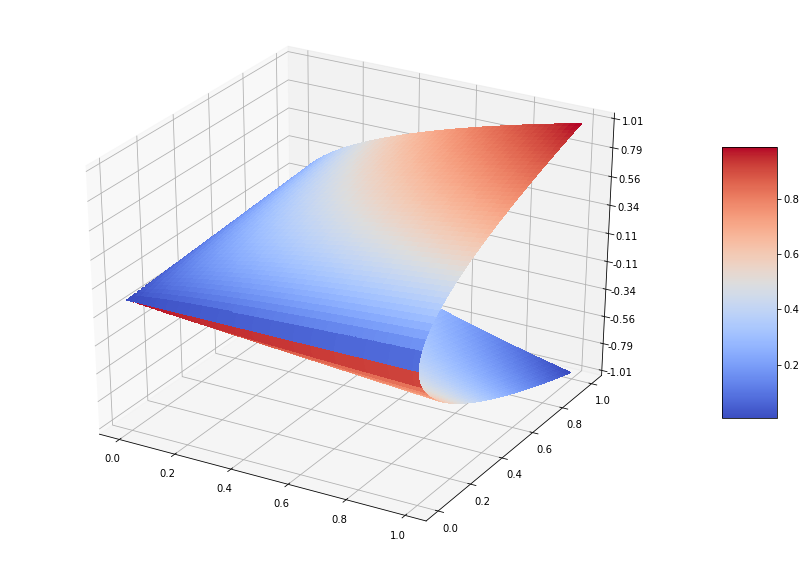

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=[15,10])
ax = fig.gca(projection='3d')

X = np.arange(0, 1, 0.0025)
Y = np.arange(0, 1, 0.0025)

X, Y = np.meshgrid(X, Y)
R = X + Y
Z1 = np.sqrt(X*Y)
Z2 = -np.sqrt(X*Y)
surf1 = ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
surf2 = ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
surf3 = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf1, shrink=0.5, aspect=5)

plt.show()

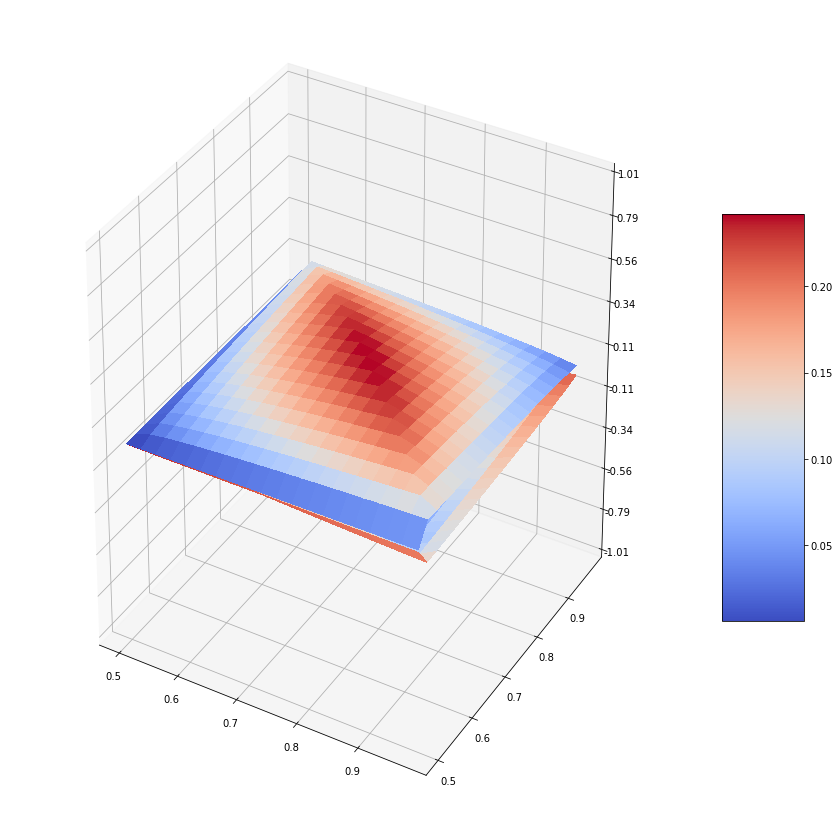

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=[15,15])
ax = fig.gca(projection='3d')

X = np.arange(0.5001, 1, 0.025)
Y = np.arange(0.5001, 0.99, 0.025)

X, Y = np.meshgrid(X, Y)
Z1 = np.min([np.sqrt((X-0.5)*(Y-0.5)), np.sqrt((1-X)*(1-Y))], axis=0)
Z2 = np.max([-np.sqrt((X-0.5)*(Y-0.5)), -np.sqrt((1-X)*(1-Y))], axis=0)

surf1 = ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
surf2 = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf1, shrink=0.5, aspect=5)

plt.show()

In [29]:
# Himmelblau

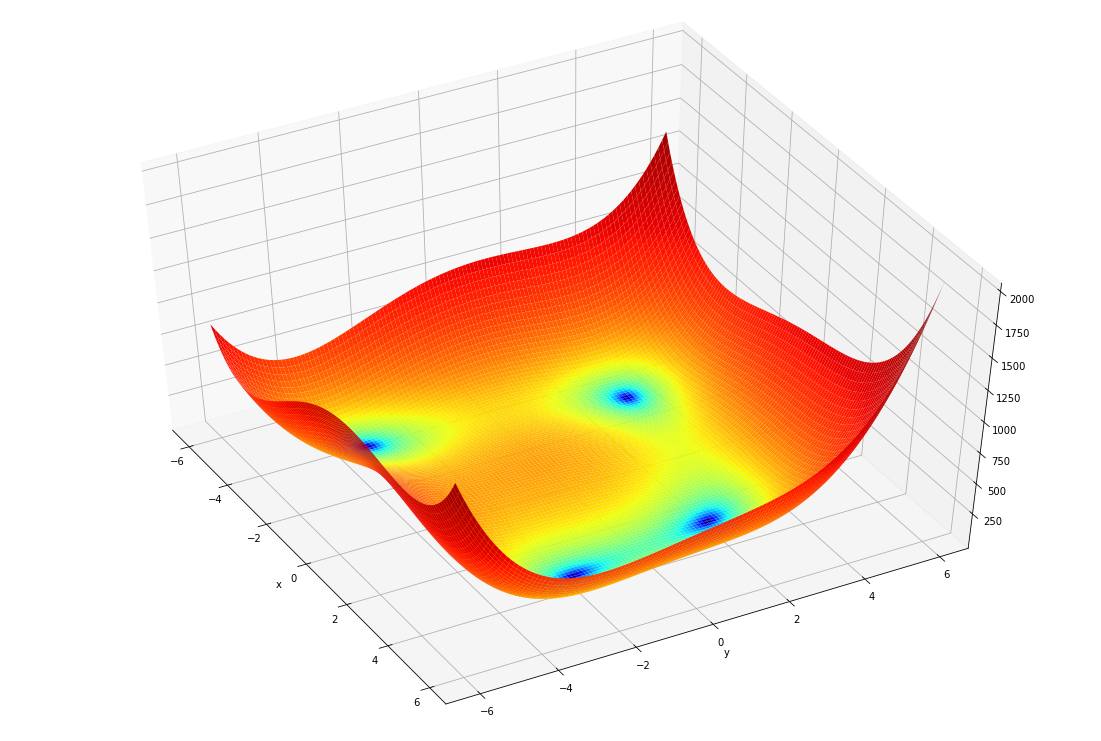

In [42]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=[15,10])
ax = Axes3D(fig, azim = -29, elev = 49)
X = np.arange(-6, 6, 0.1)
Y = np.arange(-6, 6, 0.1)
X, Y = np.meshgrid(X, Y)
Z = (X*X+Y-11)**2 + (X+Y*Y-7)**2
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet)

plt.xlabel("x")
plt.ylabel("y")

plt.savefig("Himmelblau function.svg")

plt.show()

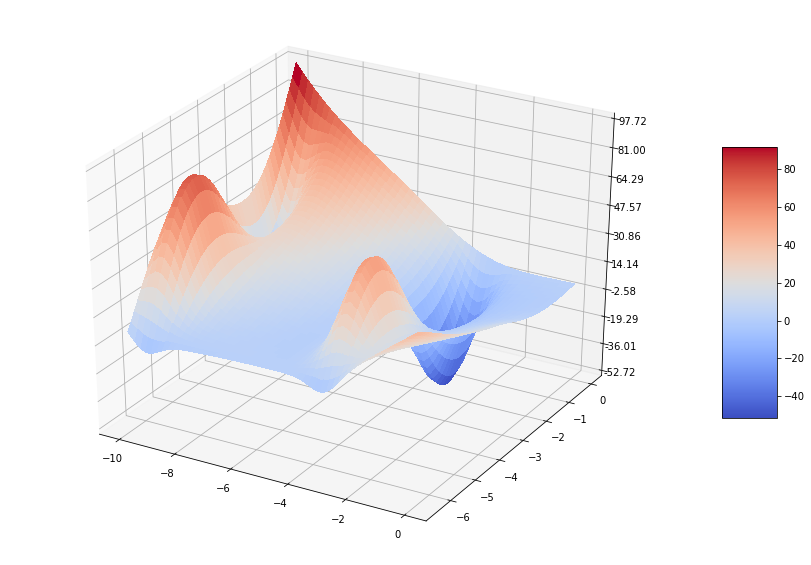

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plot
import numpy as np

fig = plot.figure(figsize=[15,10])
ax = fig.gca(projection='3d')

X = np.linspace(-10,0,50)  
Y = np.linspace(-6.5,0,50)  
    
X, Y = np.meshgrid(X, Y)

Z = np.sin(Y)*np.exp((1-np.cos(X))**2)+np.cos(X)*np.exp((1-np.sin(Y)**2))+(X-Y)**2

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
         linewidth=0, antialiased=False)

 
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plot.show()